In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="darkgrid")

In [3]:
beta = np.linspace(0, 1)
proba = np.linspace(0, 1)

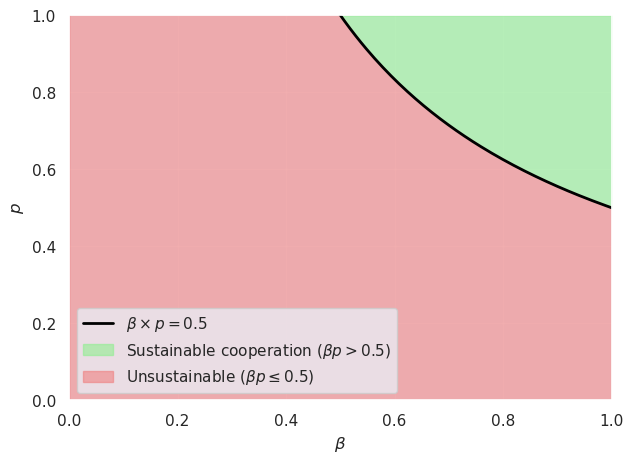

In [4]:
# Variables
beta = np.linspace(0.001, 1, 200)  # éviter 0 pour ne pas diviser par zéro
p = 0.5 / beta

# Create figure
plt.figure(figsize=(7,5))

# Plot the threshold curve
plt.plot(beta, p, label=r'$\beta \times p = 0.5$', color='black', lw=2)
# Fill sustainable zone
plt.fill_between(beta, p, 1, where=(p <= 1), color='lightgreen', alpha=0.6, label='Sustainable cooperation ($\\beta p > 0.5$)')
# Fill unsustainable zone
plt.fill_between(beta, 0, p, color='lightcoral', alpha=0.6, label='Unsustainable ($\\beta p \\leq 0.5$)')

# Axes and labels
plt.xlabel(r'$\beta$', fontsize=12)
plt.ylabel(r'$p$', fontsize=12)
# plt.title(r'Condition for Intergenerational Cooperation: $\beta p > 0.5$', fontsize=13)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(loc='lower left')
plt.grid(alpha=0.3)

# plt.tight_layout()
plt.savefig("img/intra_inter/beta_p_condition.png", dpi=300)
plt.show()


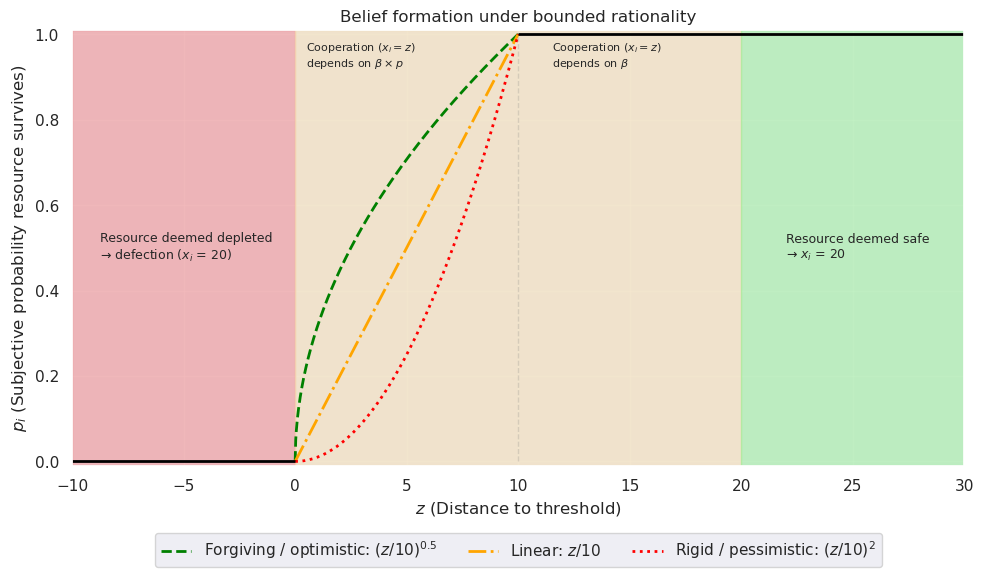

In [5]:
# Parameters of the game
S = 60     # total resource
T = 30     # sustainability threshold
n = 3      # players per generation
S_n = S / n

# Range for z (distance to threshold)
z = np.linspace(0, 10, 400)

# Define belief functions
def phi_forgiving(z): return np.clip((z / 10)**0.5, 0, 1)
def phi_linear(z): return np.clip((z / 10), 0, 1)
def phi_rigid(z): return np.clip((z / 10)**2, 0, 1)

# Create figure
plt.figure(figsize=(10, 6))

# Fill background zones
plt.axvspan(-10, 0, color='lightcoral', alpha=0.5)
plt.axvspan(0, S_n, color='wheat', alpha=0.6)
plt.axvspan(S_n, 30, color='lightgreen', alpha=0.5)

# Plot belief functions
plt.plot(z, phi_forgiving(z), color='green', ls='--', lw=2, label='Forgiving / optimistic: $(z/10)^{0.5}$')
plt.plot(z, phi_linear(z), color='orange', ls='-.', lw=2, label='Linear: $z/10$')
plt.plot(z, phi_rigid(z), color='red', ls=':', lw=2, label='Rigid / pessimistic: $(z/10)^2$')
plt.hlines(y=0, xmin=-10, xmax=0, color="black", lw=2)
plt.hlines(y=1, xmin=10, xmax=30, color="black", lw=2)
plt.vlines(x=10, ymin=0, ymax=1, color="gray", ls="--", lw=1, alpha=0.25)

# Labels and annotations
plt.text(-8.75, 0.5, f"Resource deemed depleted\n→ defection ($x_i$ = {int(S_n)})", va='center', ha='left', fontsize=9)
plt.text(0.5, 0.95, "Cooperation ($x_i=z$)\ndepends on $\\beta \\times p$", va='center', ha='left', fontsize=8)
plt.text(11.5, 0.95, "Cooperation ($x_i=z$)\ndepends on $\\beta$", va='center', ha='left', fontsize=8)
plt.text(22, 0.5, f"Resource deemed safe\n→ $x_i$ = {int(S_n)}", va='center', ha='left', fontsize=9)

plt.xlabel(r"$z$ (Distance to threshold)")
plt.ylabel(r"$p_i$ (Subjective probability resource survives)")
plt.title("Belief formation under bounded rationality")
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.25), ncol=3)
plt.grid(alpha=0.3)
plt.xlim(-10, 30)
plt.ylim(-0.01, 1.01)

plt.tight_layout()
plt.savefig("img/intra_inter/subjective_prob.png", dpi=300)
plt.show()


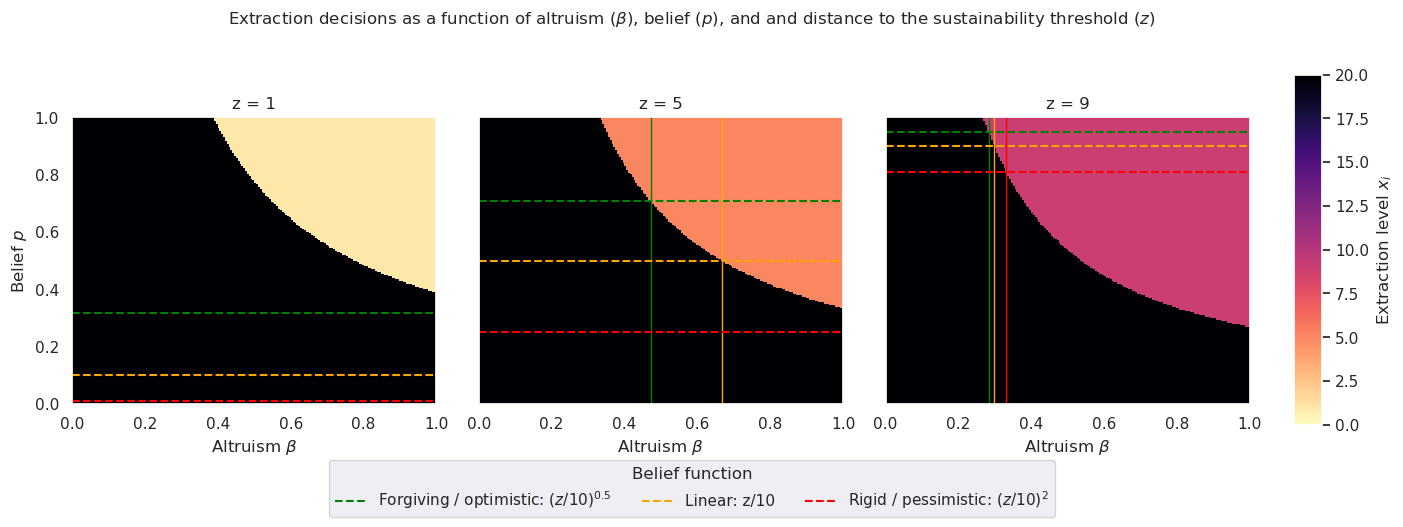

In [6]:
import warnings
warnings.filterwarnings("ignore", message=".*tight_layout.*")


# Parameters
z_values = [1, 5, 9]  # low, medium, high sacrifice levels
beta = np.linspace(0, 1, 200)
p = np.linspace(0, 1, 200)
B, P = np.meshgrid(beta, p)

# Threshold condition for cooperation
def coop_condition(z):
    return (20 - z) / (50 - z)

# Decision function: x = 20 if defect, x = z if cooperate
def extraction(beta, p, z):
    cond = beta * p >= coop_condition(z)
    return np.where(cond, z, 20)

# Belief functions
def phi_concave(z): return (z / 10)**0.5
def phi_linear(z): return (z / 10)
def phi_convex(z): return (z / 10)**2

phi_funcs = {"Forgiving / optimistic: $(z/10)^{0.5}$": ("green", phi_concave), "Linear: z/10": ("orange", phi_linear), "Rigid / pessimistic: $(z/10)^2$": ("red", phi_convex)}

# Plot
fig, axes = plt.subplots(1, 3, figsize=(14, 5), sharey=True)

for i, z in enumerate(z_values):
    ax = axes[i]
    X = extraction(B, P, z)
    c = ax.pcolormesh(beta, p, X, cmap="magma_r", shading="auto", vmin=0, vmax=20)
    
    # Belief lines
    for label, (color, func) in phi_funcs.items():
        y_val = np.clip(func(z), 0, 1)
        ax.axhline(y=y_val, color=color, ls="--", lw=1.5, label=label if i == 2 else None)
        # Intersection line (threshold)
        beta_thresh = coop_condition(z) / y_val if y_val > 0 else np.nan
        if beta_thresh <= 1:
            ax.axvline(x=beta_thresh, color=color, lw=1)
    
    ax.set_title(f"z = {z}")
    ax.set_xlabel(r"Altruism $\beta$")
    if i == 0:
        ax.set_ylabel(r"Belief $p$")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.grid(alpha=0.2)

cbar_ax = fig.add_axes([0.93, 0.15, 0.02, 0.7])  # [x, y, width, height]
fig.colorbar(c, cax=cbar_ax, label="Extraction level $x_i$")

# Legend and title
fig.legend(title="Belief function", loc="lower center", ncol=3, bbox_to_anchor=(0.5, -0.05))
fig.suptitle("Extraction decisions as a function of altruism ($β$), belief ($p$), and and distance to the sustainability threshold ($z$)\n", fontsize=12)

fig.tight_layout(rect=[0, 0.05, 0.92, 0.95])  # leave room for colorbar on right
plt.savefig("img/intra_inter/extraction_decisions_z.png", dpi=300, bbox_inches="tight")
plt.show()
